In [1]:
import h5py
import librosa
import numpy as np

file = h5py.File('dataset.h5', 'r')


labels = file['label'][:36406].squeeze()
gender_labels = file['gender'].squeeze()
print('done!')
relevant_indexes =  np.where(gender_labels == 'male')

print('done!')
y = file['label'][relevant_indexes]
print('done!')
X = file['mel_spec'][relevant_indexes]
print('done!')

X.shape, y.shape

done!
done!
done!
done!


((28388, 12, 42), (28388, 1))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19019, 36, 42), (9369, 36, 42), (19019, 1), (9369, 1))

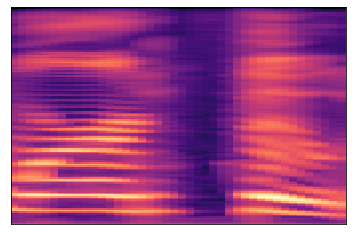

array([[-21.60799 , -20.1454  , -19.92197 , ..., -18.386524, -19.197872,
        -20.600376],
       [-21.385508, -21.43161 , -22.03455 , ..., -21.67913 , -21.99818 ,
        -23.29573 ],
       [-19.734455, -19.57219 , -19.978783, ..., -20.062634, -19.429605,
        -19.857994],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [5]:
import librosa.display
import matplotlib.pyplot as plt
librosa.display.specshow(X_train[1])
plt.show()
X_train[0]

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalizationV2
from keras.layers import Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, Reshape
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import adam_v2
import keras

# import rms prop from keras


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
opt = adam_v2.Adam(learning_rate=0.00005)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

feature_shape = X_train[0].shape
print(feature_shape)
model = Sequential()
model.add(Reshape(target_shape=(
    feature_shape[0], feature_shape[1], 1), input_shape=(feature_shape[0], feature_shape[1])))
    
model.add(Conv2D(16, (3, 3), activation='relu', strides=(2, 1), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 1), padding='same'))
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',
          strides=(1, 1), padding='same'))
# model.add(BatchNormalizationV2(axis=0))
model.add(MaxPooling2D((2, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# add batch normalization

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])


(36, 42)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 36, 42, 1)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 18, 42, 16)        160       
                                                                 
 dropout_7 (Dropout)         (None, 18, 42, 16)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 42, 64)         9280      
                                                                 
 conv2d_18 (Conv2D)          (None, 5, 42, 64)         36928     
                                                                 
 conv2d_19 (Conv2D)          (None, 5, 42, 128)        73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 42, 1

In [18]:
cnnhistory=model.fit(X_train, y_train, batch_size=512, epochs=200,validation_data=(X_test, y_test), callbacks=[es], verbose=1)


Epoch 1/200
38/38 [==============================] - 4s 79ms/step - loss: 1.6711 - accuracy: 0.2620 - val_loss: 1.5317 - val_accuracy: 0.3272
Epoch 2/200
38/38 [==============================] - 3s 73ms/step - loss: 1.5182 - accuracy: 0.3393 - val_loss: 1.5239 - val_accuracy: 0.3269
Epoch 3/200
38/38 [==============================] - 3s 70ms/step - loss: 1.4565 - accuracy: 0.3699 - val_loss: 1.4352 - val_accuracy: 0.3826
Epoch 4/200
38/38 [==============================] - 3s 70ms/step - loss: 1.4124 - accuracy: 0.3971 - val_loss: 1.3819 - val_accuracy: 0.4200
Epoch 5/200
38/38 [==============================] - 3s 70ms/step - loss: 1.3718 - accuracy: 0.4205 - val_loss: 1.3304 - val_accuracy: 0.4434
Epoch 6/200
38/38 [==============================] - 3s 71ms/step - loss: 1.3308 - accuracy: 0.4417 - val_loss: 1.2993 - val_accuracy: 0.4531
Epoch 7/200
38/38 [==============================] - 3s 71ms/step - loss: 1.2890 - accuracy: 0.4605 - val_loss: 1.2495 - val_accuracy: 0.4776
Epoch 

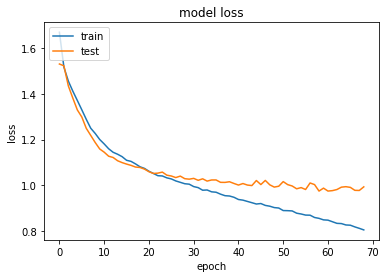

In [19]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

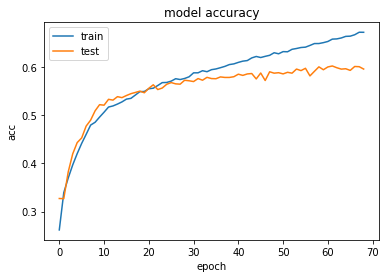

In [20]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
cnnhistory.model.save('cnn_60.h5')